In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import sympy as sp
from sympy.interactive import printing
printing.init_printing(use_latex=True) # For better representation

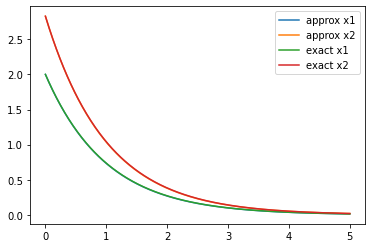

1.6658165327021135


In [2]:
x = np.array([2,2*np.sqrt(2)])
h = 0.01

xt = [x.copy()]
t = [0]

for i in range(int(5/h)):
    x0p = x[0]
    x1p = x[1]
    x[0] = x0p + h * (-3*x0p + np.sqrt(2)*x1p)
    x[1] = x1p + h * (np.sqrt(2)*x0p - 2*x1p)

    xt.append(x.copy())
    t.append(h*(i+1))
xt = np.array(xt)
t = np.array(t)
plt.plot(t,xt[:,0], label = 'approx x1')
plt.plot(t,xt[:,1], label = 'approx x2')

x1 = 2*np.exp(-t)
x2 = 2*np.sqrt(2)*np.exp(-t)

plt.plot(t,x1, label = 'exact x1')
plt.plot(t,x2, label = 'exact x2')

plt.legend()
plt.show()

dis = np.sqrt((x1 - xt[:,0])**2 + (x2 - xt[:,1])**2)
dis = dis.sum()
print(dis)

In [3]:
m = [1, 1, 1, 1, -1]
r = [0, 10, 28, 36, 0]
k = [196, 196, 196, 196, -4 ]
u0 = [0.2, 0.2, 0.2, 0.2 ,0.2]
v0 = [0, 0, 0, 0, 0]
colors = [ 'm','b','k','r','g']

In [4]:
def Q4(m,r,k,u0,v0):
    
    t = sp.symbols('t')
    u = sp.Function('u')(t)

    eqa = sp.Eq(m*u.diff(t,2)+r*u.diff(t)+k*u, 0)
    sol = sp.dsolve(eqa, ics = {u.subs(t,0):u0, u.diff(t).subs(t,0):v0})

    if (m <= 0) or (k <= 0) or (r < 0):
        category = 'it is not a spring model'
        return 0, category
    else:
        mu = r**2 - 4*m*k
        if r == 0:
            category = 'undamped'
        elif mu > 0:
            category = 'overdamped'
        elif mu == 0:
            category = 'critically damped'
        else:
            category ='underdamped'

    return sol, category


Category undamped and solution:


Category underdamped and solution:


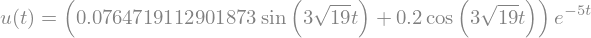

Category critically damped and solution:


Category overdamped and solution:


Category it is not a spring model and solution:


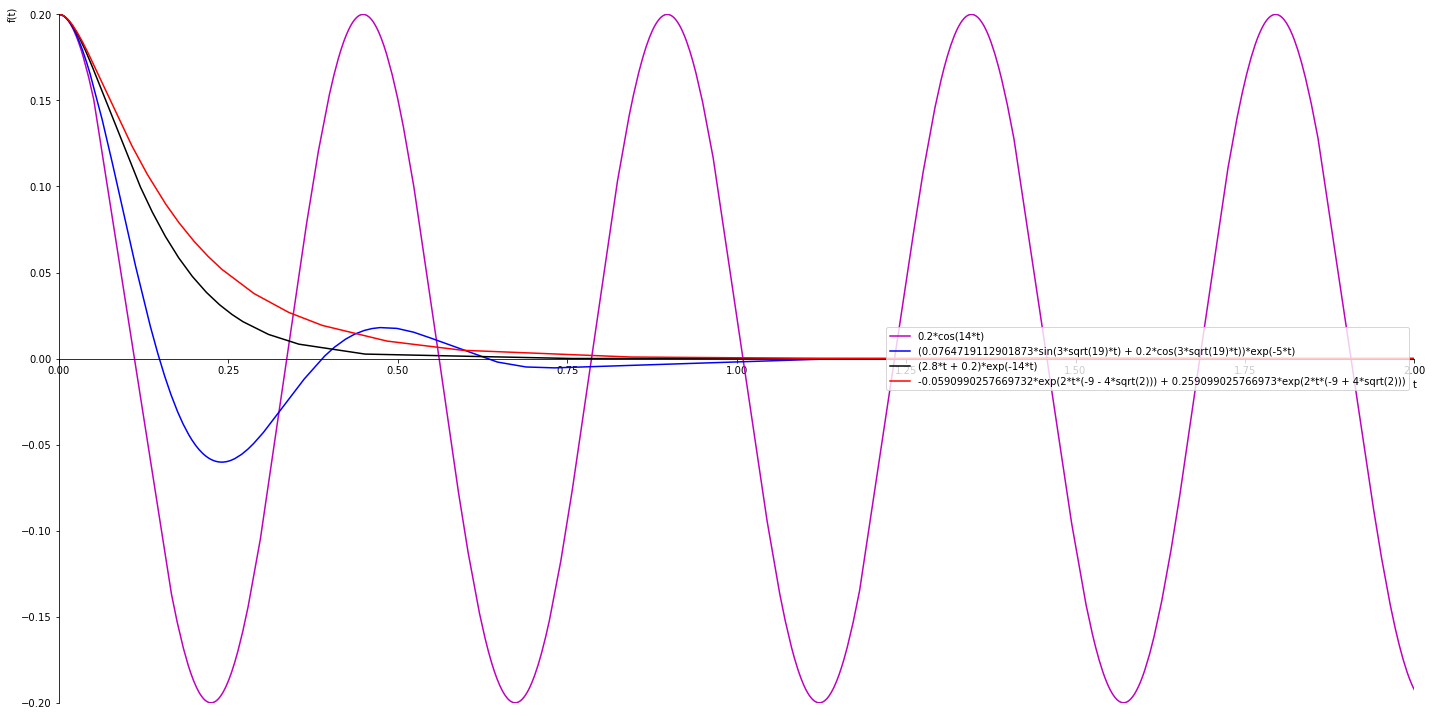

In [16]:
ps = None

for i in range(5):
    sol, cat = Q4(m[i],r[i],k[i],u0[i],v0[i])
    
    print("Category {} and solution:".format(cat))
    display(sol)
    

    if(cat != 'it is not a spring model'):
        
        p = sp.plot(sol.rhs, xlim=(0,2), ylim=(-0.2, 0.2), show=False, line_color = colors[i], legend=sol.rhs,xlabel="t", ylabel="f(t)", size = (20,10))
        if ps:
            ps.extend(p)
        else:
            ps = p
ps.show()